In [1]:
# Supress warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
car = pd.read_csv('.../CarPrice_Assignment.csv')

In [4]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
car.shape

(205, 26)

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

### Derived metrics

In [8]:
# creating new column with car company name

car['CarCompany'] = car['CarName'].map(lambda x: x.split(' ', 1)[0].lower())

In [9]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [10]:
car['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [11]:
# Correcting the spelling mistakes of few car companies 
# ('porcshce' to 'porsche'), ('maxda' to 'mazda'), ('toyouta' to 'toyota'),('vokswagen' to 'volkswagen') and ('vw' to 'volkswagen')

car.loc[car['CarCompany']=='porcshce', 'CarCompany'] = 'porsche'
car.loc[car['CarCompany'] == 'maxda', 'CarCompany'] = 'mazda'
car.loc[car['CarCompany'] == 'toyouta', 'CarCompany'] = 'toyota'
car.loc[car['CarCompany'] == 'vokswagen', 'CarCompany'] = 'volkswagen'
car.loc[car['CarCompany'] == 'vw', 'CarCompany'] = 'volkswagen'

In [12]:
car['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [13]:
# Dropping column 'CarName' and 'car_ID'

car.drop(['CarName','car_ID'], axis = 1, inplace = True)

In [15]:
# Torque

car['torque'] = 5252 * car['horsepower']/car['peakrpm']

In [16]:
# power to weight ratio 

car['powerweightratio'] = car['horsepower']/car['curbweight']

In [17]:
# Frontal cross-section area

car['fcsa'] = car['carheight']*car['carwidth']*0.85

In [18]:
# bore stroke ratio

car['borestrokeratio'] = car['boreratio']/car['stroke']

In [19]:
# wheelbase car width ratio

car['wheelbasewidthratio'] = car['wheelbase']/car['carwidth']

In [20]:
# wheel base car height ratio

car['wheelbaseheightratio'] = car['wheelbase']/car['carheight']

In [21]:
# Volumetric measure

car['volume'] = car['carlength']*car['carwidth']*car['carheight']

In [22]:
car.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,citympg,highwaympg,price,torque,powerweightratio,fcsa,borestrokeratio,wheelbasewidthratio,wheelbaseheightratio,volume
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,...,25.219512,30.751220,13276.710571,107.133295,0.040063,3010.993437,1.034167,1.497650,1.839009,618719.288873
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,...,6.542142,6.886443,7988.852332,40.119139,0.009570,190.407750,0.149055,0.058854,0.090892,79463.195262
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,...,13.000000,16.000000,5118.000000,49.430588,0.019936,2658.868000,0.772334,1.344624,1.619289,452643.156000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,...,19.000000,25.000000,7788.000000,76.591667,0.034188,2868.435500,0.935028,1.468652,1.776965,566490.600000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,...,24.000000,30.000000,10295.000000,95.490909,0.037801,2964.800000,0.983516,1.485714,1.838521,601385.700000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,...,30.000000,34.000000,16503.000000,126.923333,0.044489,3137.137500,1.067847,1.519941,1.899461,666250.200000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,...,49.000000,54.000000,45400.000000,275.204800,0.085561,3507.618500,1.579909,1.686192,2.140152,846007.659000


### Visualising numerical features

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Making the pairplot scrollable as there are large number of features

from IPython.display import display, HTML
CSS = """div.output_area img {max-width:None !important;max-height: None !important";}"""
display(HTML('<style>{}</style>'.format(CSS)))

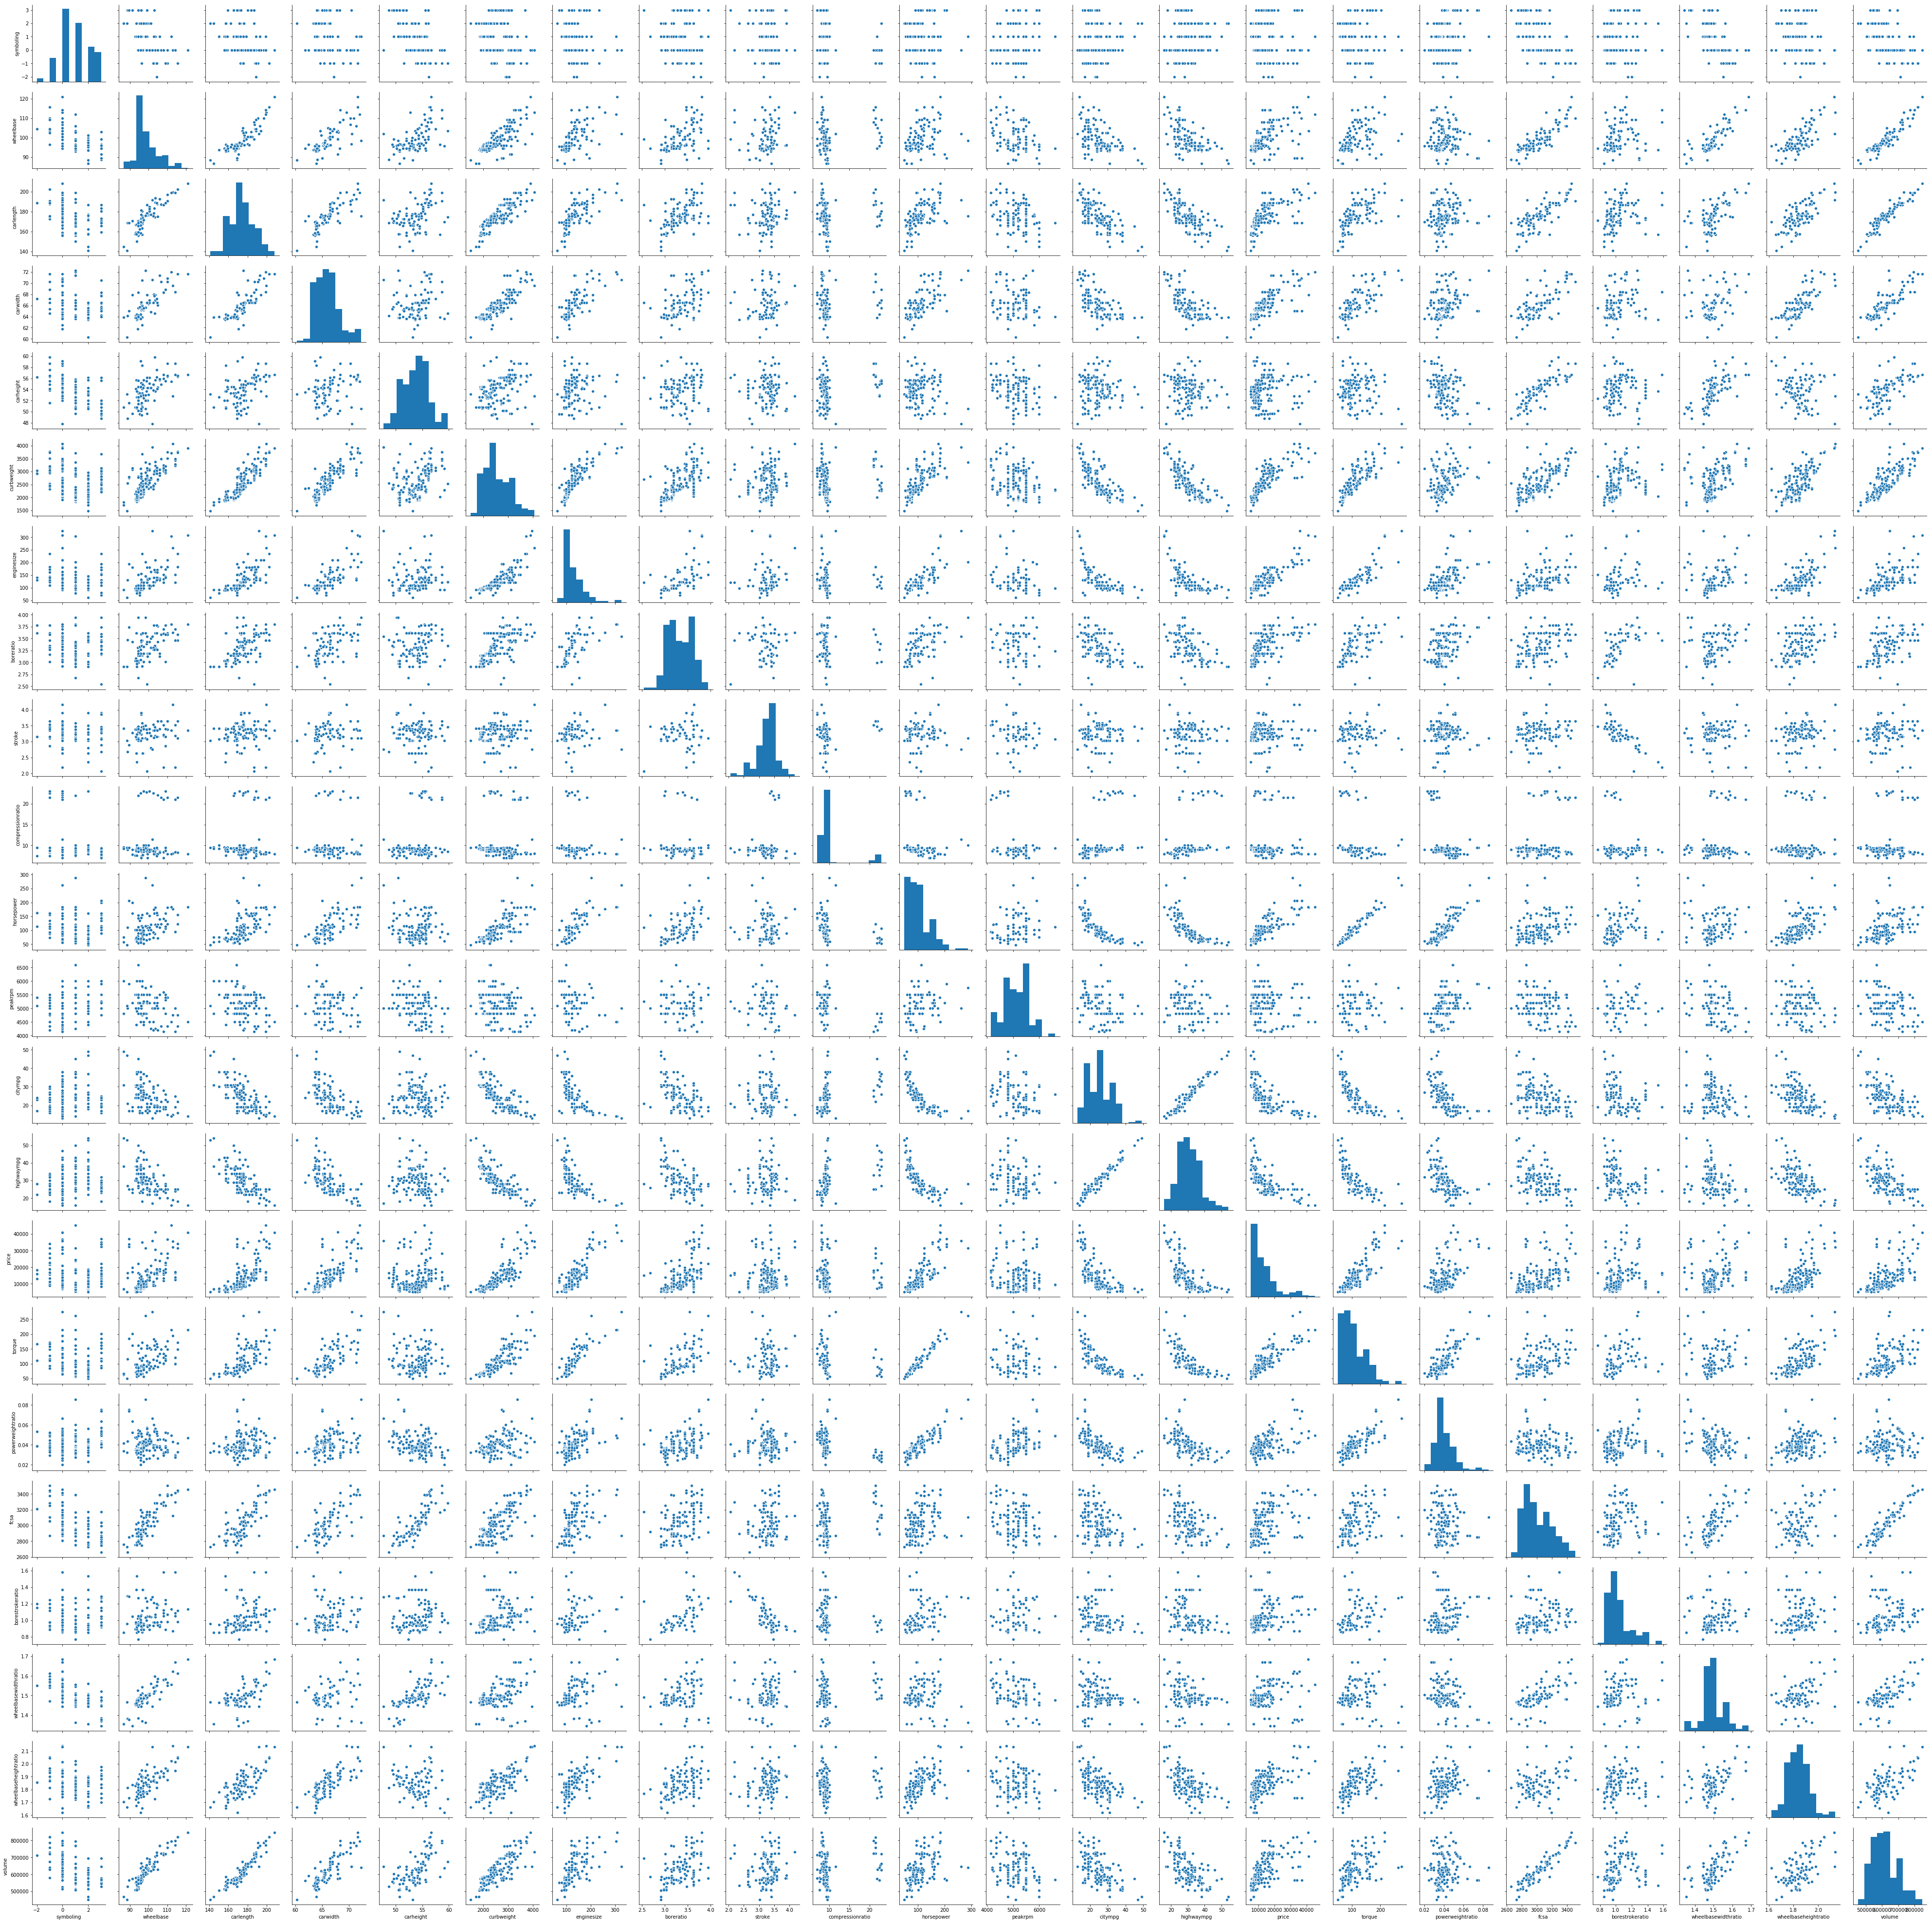

In [25]:
# plotting pairplot to see relationship between variables

sns.pairplot(car)

### Visualising categorical features

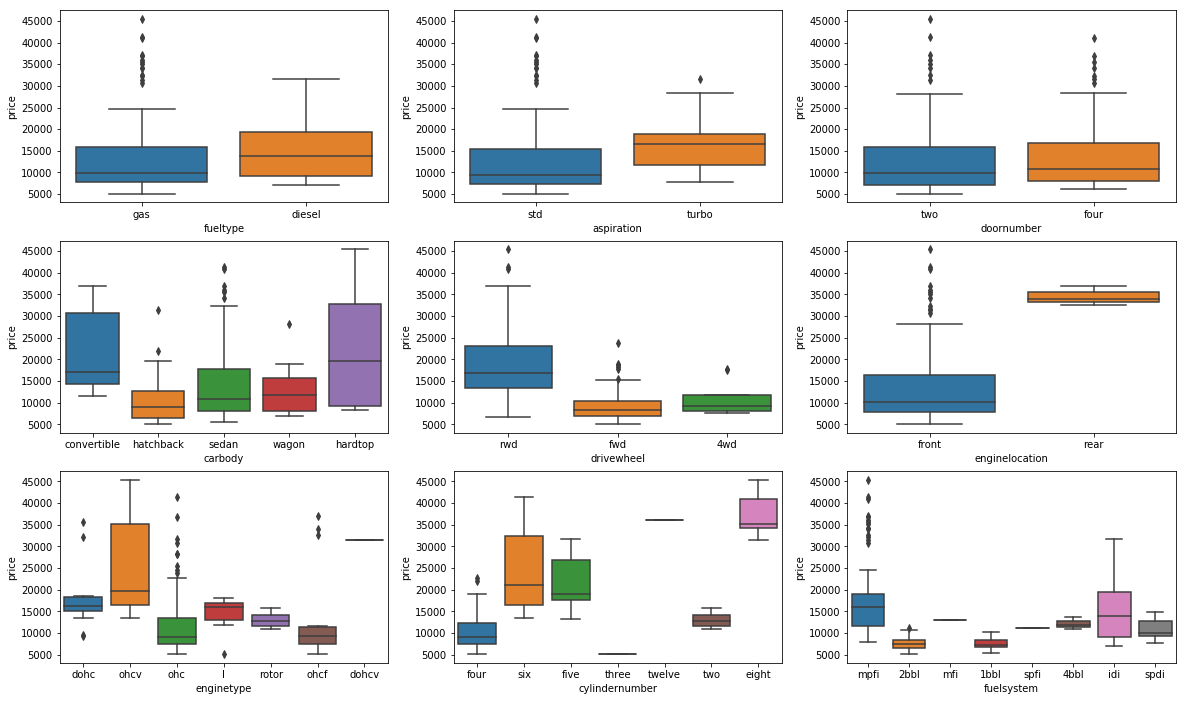

In [124]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = car)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = car)
plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = car)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = car)
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = car)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = car)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = car)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car)    

Above box plots shows the price variations for different caregorical variables. High prices can be seen as outliers for some categories, but these are due to luxury car brands

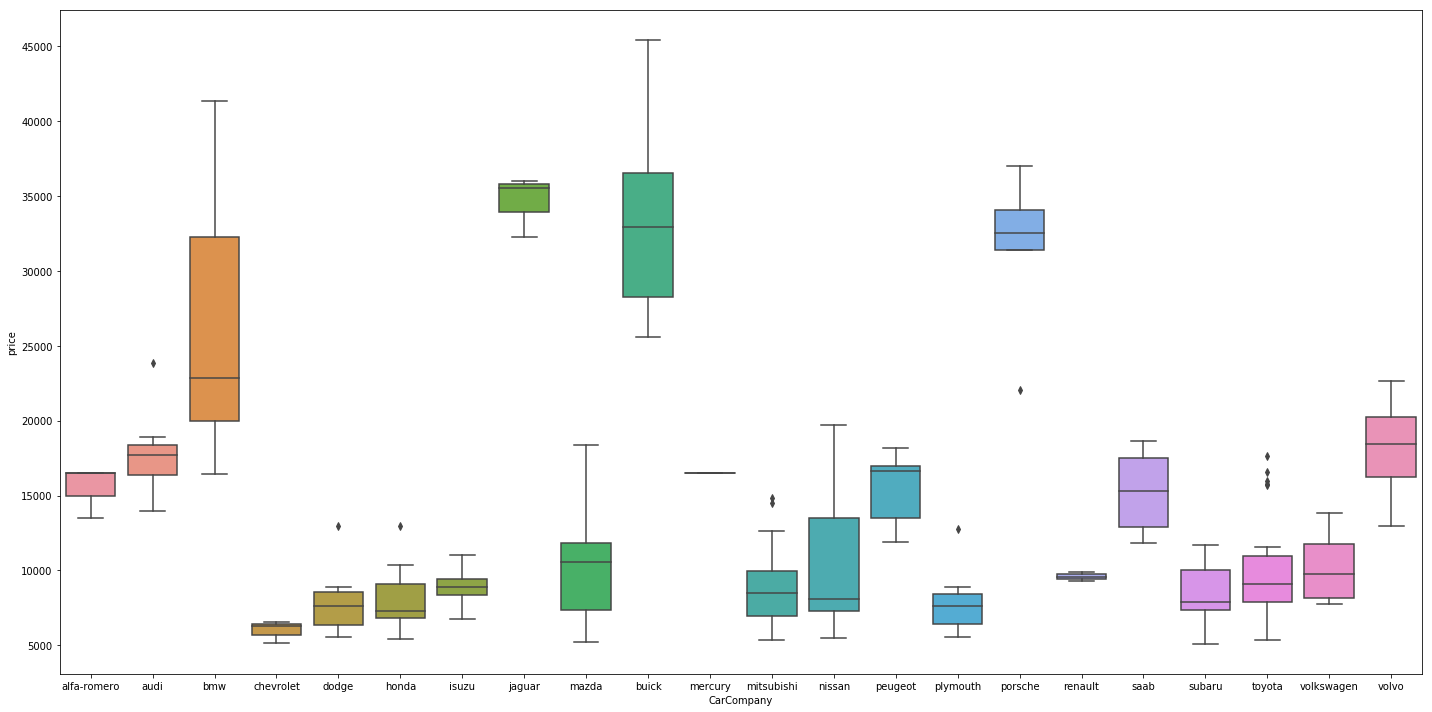

In [126]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = 'CarCompany', y = 'price', data = car) 
plt.tight_layout()

-  bmw cars are available in midrange prices aswell as high range prices
-  jaguar has high price luxury cars
-  buick has high price range luxury cars with median price higher than bmw but lower than jaguar
-  porsche has high price range cars

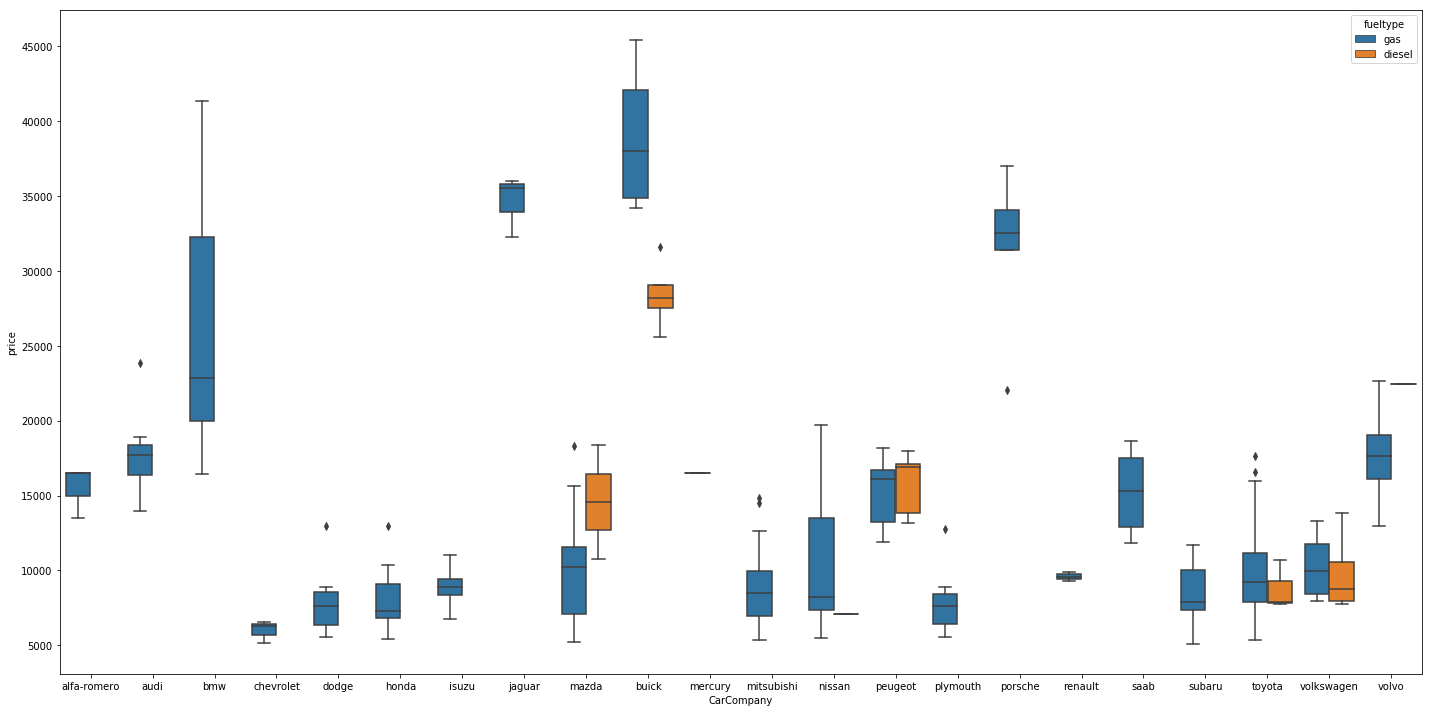

In [127]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = 'CarCompany', y = 'price', hue = 'fueltype', data = car) 
plt.tight_layout()

-  All the high price range cars are availabe in gas
-  Most of the mid and low price range cars are available gas. Very few in diesel. 

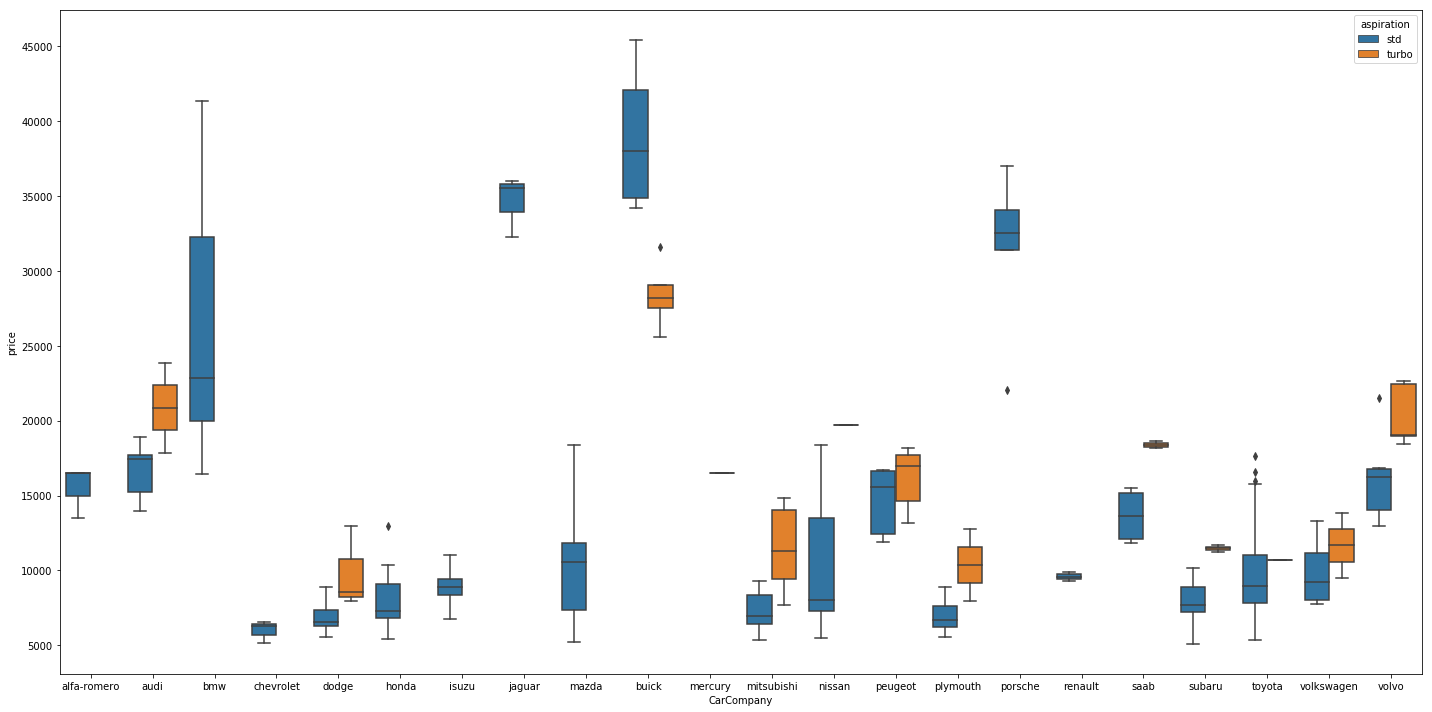

In [128]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = 'CarCompany', y = 'price', hue = 'aspiration', data = car) 
plt.tight_layout()

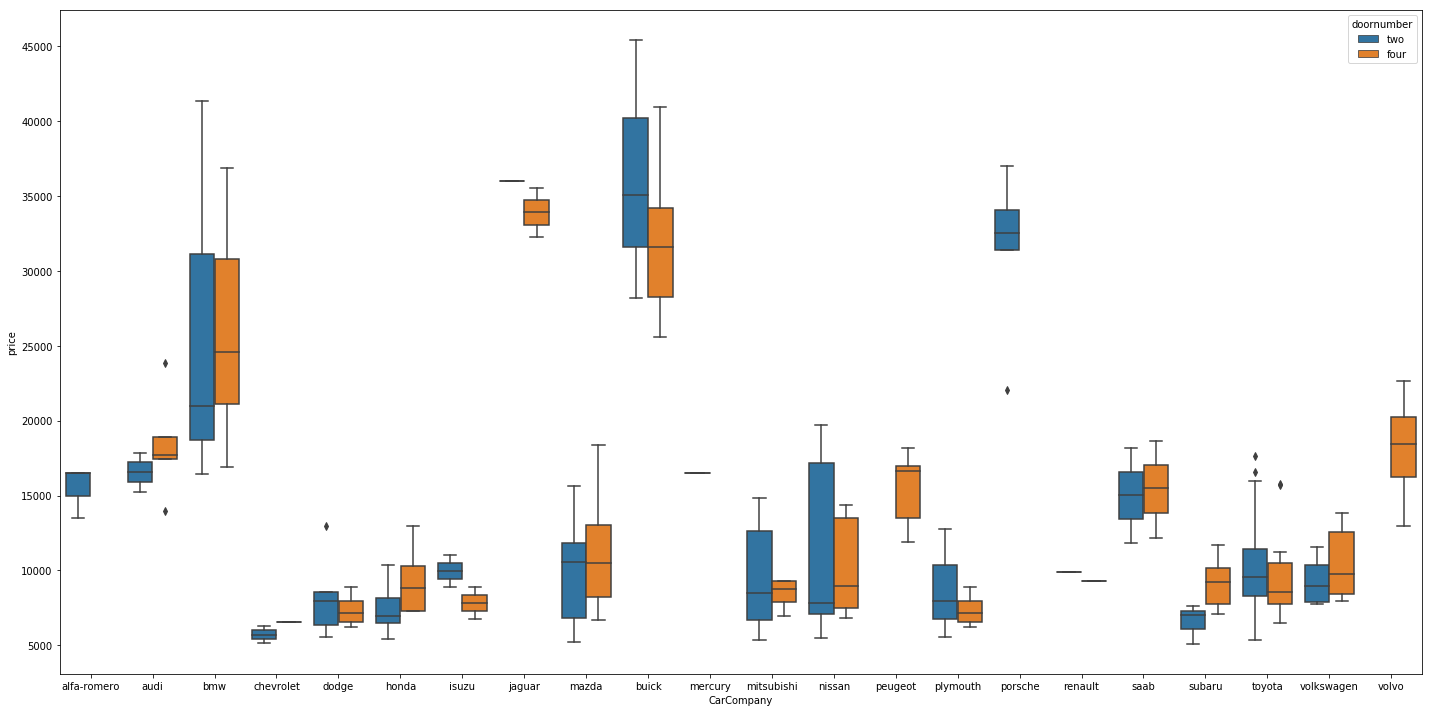

In [23]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = 'CarCompany', y = 'price', hue = 'doornumber', data = car) 
plt.tight_layout()

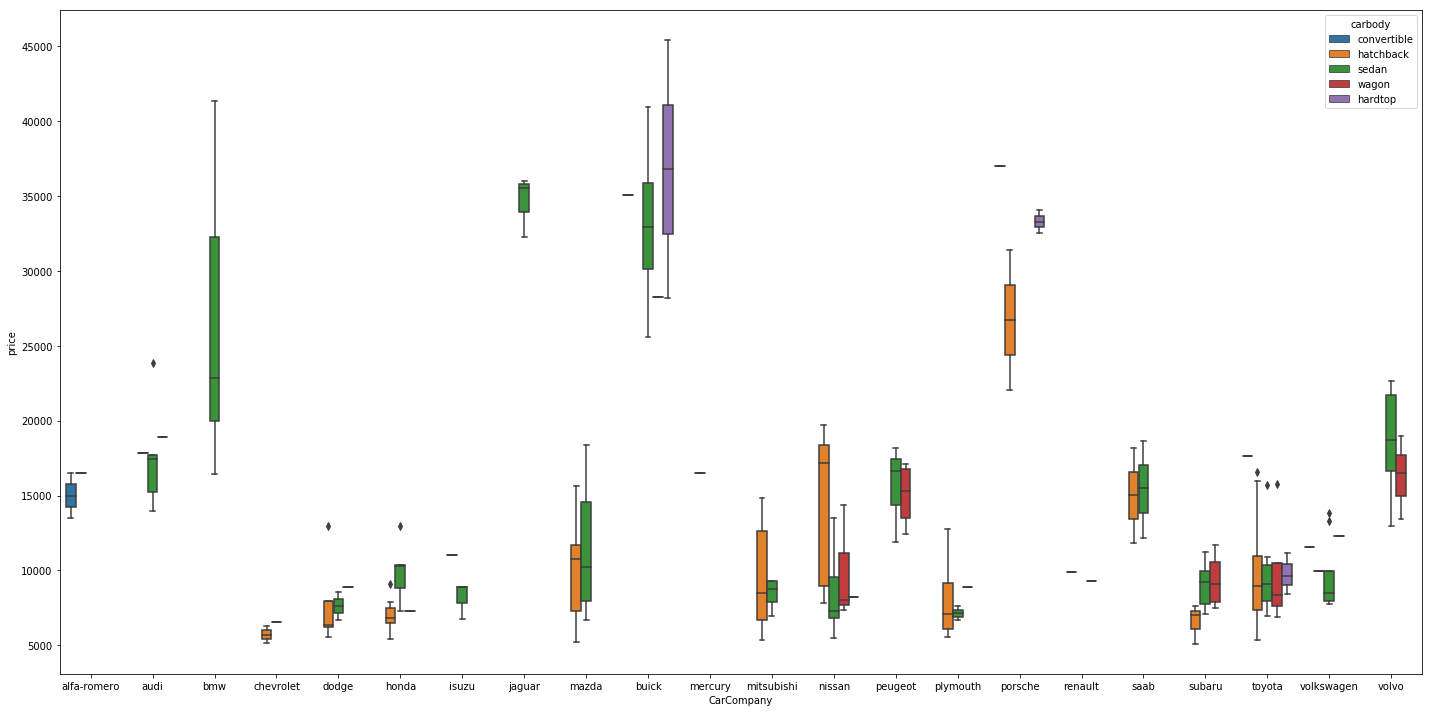

In [24]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = 'CarCompany', y = 'price', hue = 'carbody', data = car) 
plt.tight_layout()

Most high price cars are sedans

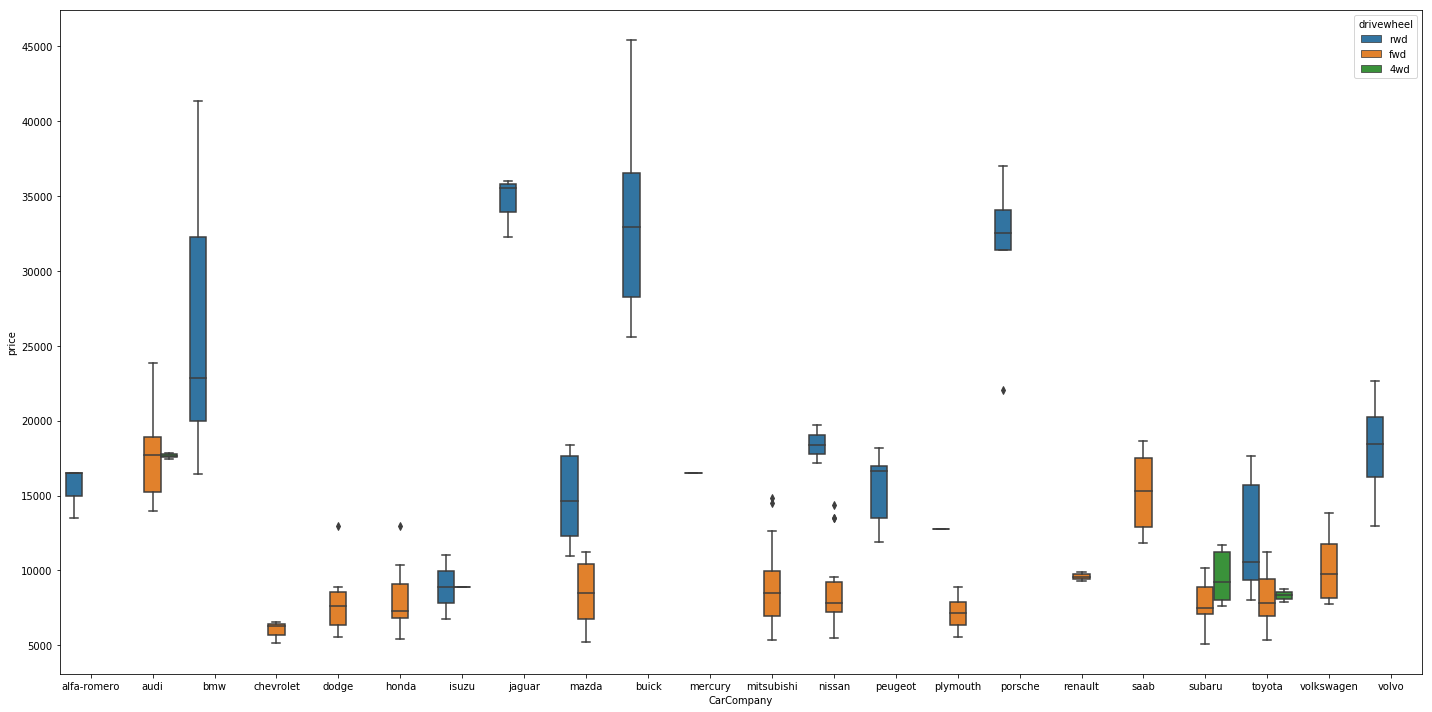

In [129]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = 'CarCompany', y = 'price', hue = 'drivewheel', data = car) 
plt.tight_layout()

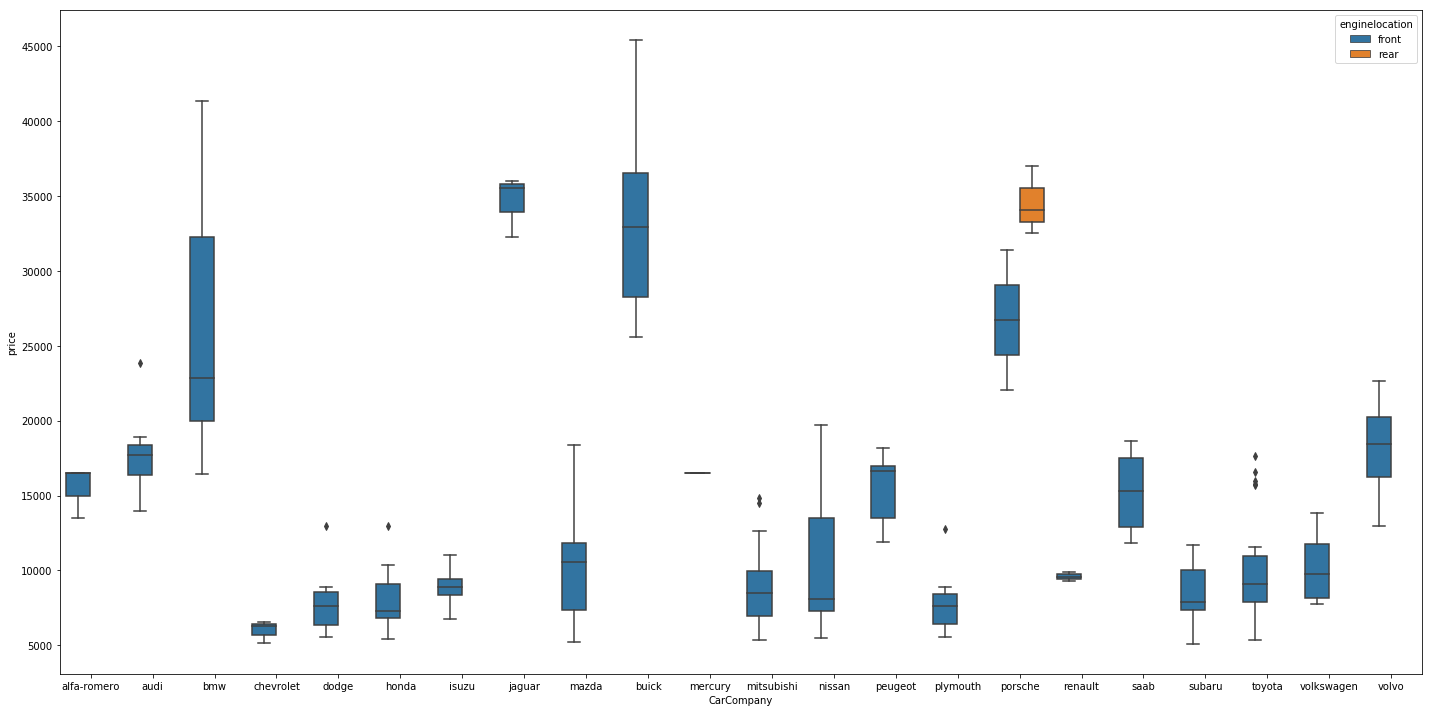

In [130]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = 'CarCompany', y = 'price', hue = 'enginelocation', data = car) 
plt.tight_layout()

-  Only porsche has cars with engines in rear.
-  They costlier than their cars with engines in front

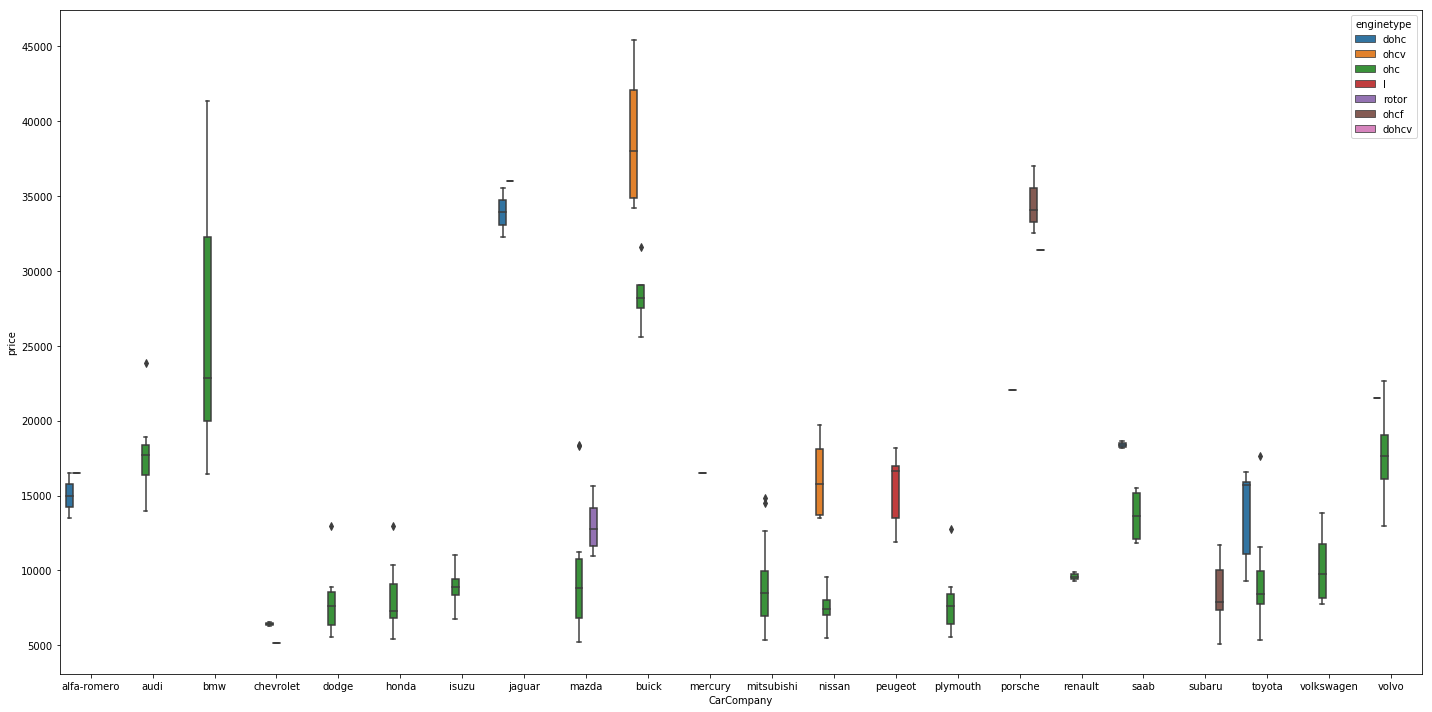

In [132]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = 'CarCompany', y = 'price', hue = 'enginetype', data = car) 
plt.tight_layout()

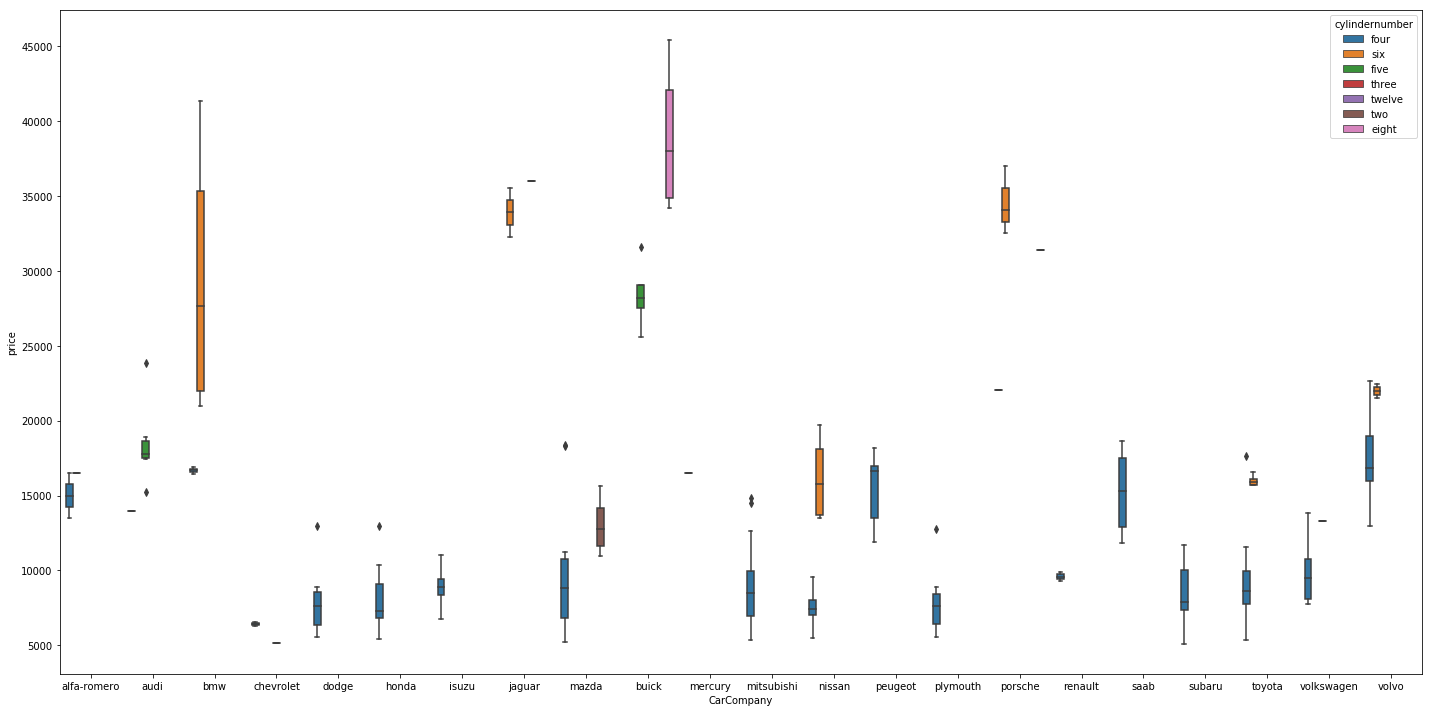

In [133]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = 'CarCompany', y = 'price', hue = 'cylindernumber', data = car) 
plt.tight_layout()

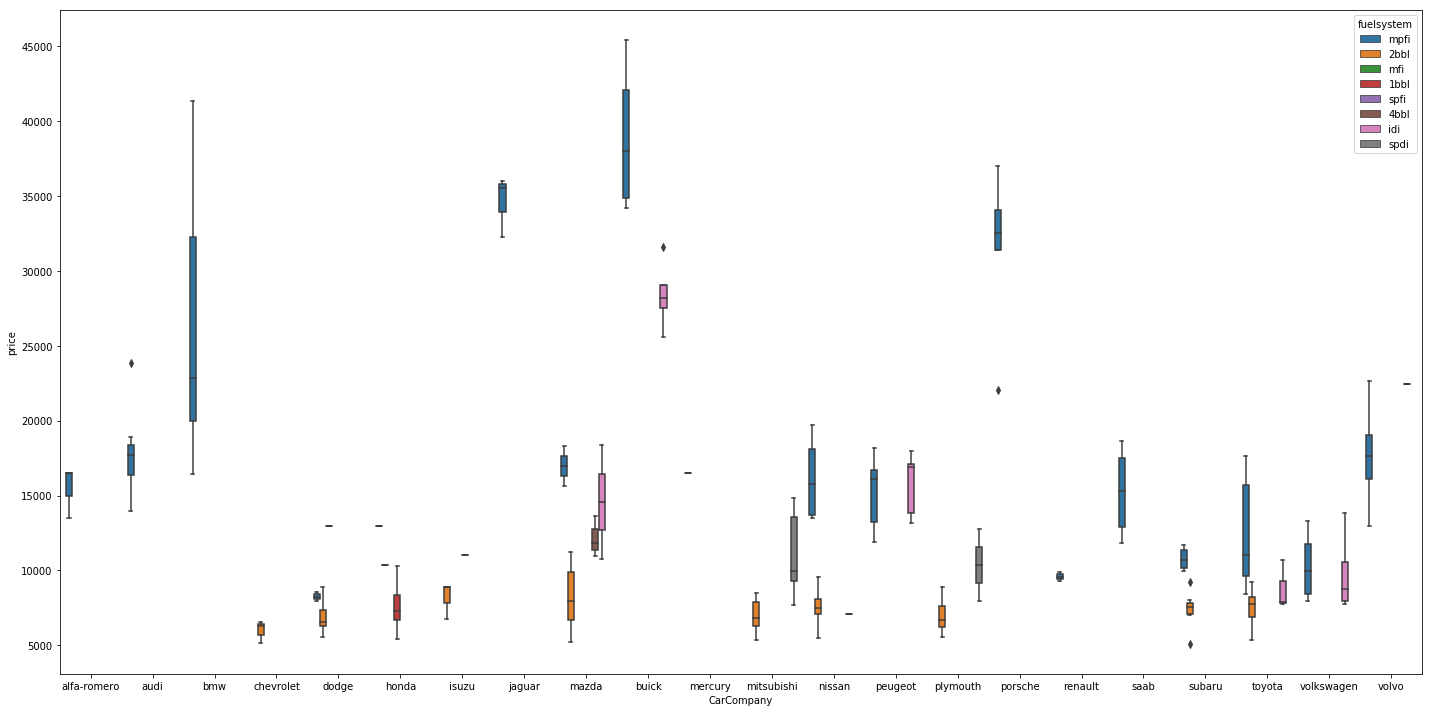

In [134]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = 'CarCompany', y = 'price', hue = 'fuelsystem', data = car) 
plt.tight_layout()

### Dummy Variables

In [26]:
# Checking the levels oof the categorical features

for col in car.columns:
    if car[col].dtype == 'O':
        print("Feature:",col)
        print("Number of unique levels:",car[col].nunique())
        print(car[col].unique(),"\n\n")

Feature: fueltype
Number of unique levels: 2
['gas' 'diesel'] 


Feature: aspiration
Number of unique levels: 2
['std' 'turbo'] 


Feature: doornumber
Number of unique levels: 2
['two' 'four'] 


Feature: carbody
Number of unique levels: 5
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'] 


Feature: drivewheel
Number of unique levels: 3
['rwd' 'fwd' '4wd'] 


Feature: enginelocation
Number of unique levels: 2
['front' 'rear'] 


Feature: enginetype
Number of unique levels: 7
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv'] 


Feature: cylindernumber
Number of unique levels: 7
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight'] 


Feature: fuelsystem
Number of unique levels: 8
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi'] 


Feature: CarCompany
Number of unique levels: 22
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 

In [27]:
# Creating a list with above features

feature_list = []
for col in car.columns:
    if car[col].dtype == 'O':
        feature_list.append(col)

In [28]:
feature_list

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'CarCompany']

In [29]:
# function for creating dummy variables for above feature

def create_dummies(cols_list, df): # takes column names list and dataframe as parameters
    for cols in cols_list:
        dummy_variables  = pd.get_dummies(df[cols], prefix = cols, prefix_sep = '_', drop_first = True) # creating dummies with original column name prefix seperated by '_' and dropping the first dummy variable
        df = pd.concat([df, dummy_variables], axis = 1) #
    df.drop(cols_list, axis = 1, inplace = True) # dropping the original feature
    return (df)   

In [30]:
car = create_dummies(feature_list, car)

In [31]:
car.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
car.shape

(205, 72)

In [33]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 72 columns):
symboling                205 non-null int64
wheelbase                205 non-null float64
carlength                205 non-null float64
carwidth                 205 non-null float64
carheight                205 non-null float64
curbweight               205 non-null int64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
citympg                  205 non-null int64
highwaympg               205 non-null int64
price                    205 non-null float64
torque                   205 non-null float64
powerweightratio         205 non-null float64
fcsa                     205 non-null float64
borestrokeratio          205 non-null float64
wheelbasewidthratio      205 non-nu

### Splitting data into training and testing set

70% training data and 30% testing data

In [34]:
from sklearn.model_selection import train_test_split

df_train, df_test  = train_test_split(car, train_size = 0.7, test_size = 0.3, random_state = 100)

In [35]:
print("Train:", df_train.shape)
print("Test:", df_test.shape)

Train: (143, 72)
Test: (62, 72)


### Rescaling features

MinMaxScaler from sklearn is used which rescales the numerical features between 0 and 1

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [37]:
# Extracting the numeric features as a list excluding the dummy variables

num_vars = []
for col in car.columns:
    if car[col].dtype == 'int64' or car[col].dtype == 'float64':
        num_vars.append(col)

In [38]:
print(num_vars)

['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'torque', 'powerweightratio', 'fcsa', 'borestrokeratio', 'wheelbasewidthratio', 'wheelbaseheightratio', 'volume']


In [39]:
# Applying scaler to all features except dummy variables

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [40]:
df_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
122,0.6,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,...,0,0,1,0,0,0,0,0,0,0
125,1.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,...,0,0,0,1,0,0,0,0,0,0
166,0.6,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,...,0,0,0,0,0,0,0,0,0,0
199,0.2,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,...,0,0,0,0,0,0,0,0,0,1


In [41]:
df_train.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,0.239200,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for model building

In [42]:
y_train = df_train.pop('price') # getting the dependent variable
X_train = df_train

In [43]:
y_train.head()

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
Name: price, dtype: float64

In [44]:
X_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
122,0.6,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,...,0,0,1,0,0,0,0,0,0,0
125,1.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,...,0,0,0,1,0,0,0,0,0,0
166,0.6,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,...,0,0,0,0,0,0,0,0,0,0
199,0.2,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,...,0,0,0,0,0,0,0,0,0,1


### Building model

__Recursive Feature Elimination (RFE) using sklearn__

In [45]:
# importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [46]:
# Running RFE

# creating linear model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE by selecting 30 variables
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [47]:
# list of features slected as True or False and their rank

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('symboling', False, 34),
 ('wheelbase', True, 1),
 ('carlength', False, 20),
 ('carwidth', True, 1),
 ('carheight', False, 16),
 ('curbweight', False, 21),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 26),
 ('compressionratio', False, 36),
 ('horsepower', True, 1),
 ('peakrpm', False, 48),
 ('citympg', False, 22),
 ('highwaympg', False, 40),
 ('torque', True, 1),
 ('powerweightratio', True, 1),
 ('fcsa', False, 17),
 ('borestrokeratio', True, 1),
 ('wheelbasewidthratio', True, 1),
 ('wheelbaseheightratio', False, 10),
 ('volume', False, 24),
 ('fueltype_gas', False, 49),
 ('aspiration_turbo', False, 7),
 ('doornumber_two', False, 47),
 ('carbody_hardtop', False, 28),
 ('carbody_hatchback', False, 27),
 ('carbody_sedan', False, 29),
 ('carbody_wagon', False, 30),
 ('drivewheel_fwd', False, 52),
 ('drivewheel_rwd', False, 35),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 31),
 ('enginetype_l', False, 6),
 ('enginetype_ohc', False, 43),
 ('eng

In [48]:
# list of features selected

col = X_train.columns[rfe.support_]
col

Index(['wheelbase', 'carwidth', 'enginesize', 'boreratio', 'horsepower',
       'torque', 'powerweightratio', 'borestrokeratio', 'wheelbasewidthratio',
       'enginelocation_rear', 'enginetype_rotor', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'CarCompany_bmw'],
      dtype='object')

In [49]:
# list of features not selected

X_train.columns[~rfe.support_]

Index(['symboling', 'carlength', 'carheight', 'curbweight', 'stroke',
       'compressionratio', 'peakrpm', 'citympg', 'highwaympg', 'fcsa',
       'wheelbaseheightratio', 'volume', 'fueltype_gas', 'aspiration_turbo',
       'doornumber_two', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'CarCompany_audi',
       'CarCompany_buick', 'CarCompany_chevrolet', 'CarCompany_dodge',
       'CarCompany_honda', 'CarCompany_isuzu', 'CarCompany_jaguar',
       'CarCompany_mazda', 'CarCompany_mercury', 'CarCompany_mitsubishi',
       'CarCompany_nissan', 'CarCompany_peugeot', 'CarCompany_plymouth',
       'C

__Building model using statsmodel for detailed statistics__

In [50]:
import statsmodels.api as sm

In [51]:
# creating X_test dataframe using RFE selected variables

X_train_rfe = X_train[col]

In [52]:
# function to add constant, create linear model and return the summary
# accepts X_training and y_training DataFrame as parameters
# returns X_training with constant and the linear model

def create_lm(X_t, y_t):
    X_t = sm.add_constant(X_t) # adding constant
    lm = sm.OLS(y_t, X_t).fit() # creating linear model
    return (X_t, lm) # return summary of linear model

In [53]:
# function to remove insignificant features
# accepts the feature name as string and DataFrame from which it is to be removed
# returns the DataFrame after dropping the feature

def remove_feature(f, X_t):
    return (X_t.drop(f, axis = 1))    

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
# Accepta the DataFrame
# Returns the Feature name with their VIF rounded off to two decimal places as a DataFrame

def calculate_vif(X_t):
    vif = pd.DataFrame()
    X = X_t.drop('const', axis = 1) # dropping the constant column
    vif['Features'] = X.columns # Feature name column
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] # calculating VIF
    vif['VIF'] = round(vif['VIF'], 2) # rounding off
    vif = vif.sort_values(by = 'VIF', ascending = False) # sorting
    return (vif)

In [55]:
# creating model, printing summary and calculating vif for data with fre selected features
X_train_lm, lm = create_lm(X_train_rfe, y_train)
print(lm.summary()) 
calculate_vif(X_train_lm)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     105.2
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.88e-63
Time:                        20:09:21   Log-Likelihood:                 197.57
No. Observations:                 143   AIC:                            -365.1
Df Residuals:                     128   BIC:                            -320.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.84

,Features,VIF
10,enginetype_rotor,inf
13,cylindernumber_two,inf
0,wheelbase,356.700000
4,horsepower,194.080000
8,wheelbasewidthratio,184.610000
1,carwidth,120.110000
6,powerweightratio,109.700000
5,torque,104.890000
2,enginesize,44.130000
3,boreratio,28.900000


___First dropping features with high vif as we are getting warnings of strong multicollinearity, so dropping 'enginetype_rotor'___

In [56]:
# Dropping highly correlated features, updating model and recalculating VIF (based on VIF)

X_train_new = remove_feature('enginetype_rotor', X_train_lm)
X_train_lm, lm = create_lm(X_train_new, y_train)
print(lm.summary()) 
calculate_vif(X_train_lm)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     105.2
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.88e-63
Time:                        20:10:36   Log-Likelihood:                 197.57
No. Observations:                 143   AIC:                            -365.1
Df Residuals:                     128   BIC:                            -320.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.84

,Features,VIF
0,wheelbase,356.70
4,horsepower,194.08
8,wheelbasewidthratio,184.61
1,carwidth,120.11
6,powerweightratio,109.70
5,torque,104.89
2,enginesize,44.13
3,boreratio,28.90
7,borestrokeratio,10.65
11,cylindernumber_twelve,1.64


___It is observed that there is no change in adjusted R-squared value. It is still 0.911. Next dropping 'wheelbase' as having high vif.___

In [57]:
# Dropping highly correlated features, updating model and recalculating VIF (based on VIF)

X_train_new = remove_feature('wheelbase', X_train_new)
X_train_lm, lm = create_lm(X_train_new, y_train)
print(lm.summary()) 
calculate_vif(X_train_lm)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     107.0
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.01e-62
Time:                        20:12:15   Log-Likelihood:                 193.32
No. Observations:                 143   AIC:                            -358.6
Df Residuals:                     129   BIC:                            -317.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.03

,Features,VIF
3,horsepower,111.18
4,torque,104.86
1,enginesize,36.03
2,boreratio,28.90
0,carwidth,25.55
5,powerweightratio,19.09
7,wheelbasewidthratio,10.54
6,borestrokeratio,10.24
10,cylindernumber_twelve,1.64
11,cylindernumber_two,1.40


-  ___adjusted R-squared value decreased to 0.907.__
-  ___Still some features with high vif present.___
-  ___Next dropping 'horsepower'___

In [58]:
# Dropping highly correlated features, updating model and recalculating VIF (based on VIF)

X_train_new = remove_feature('horsepower', X_train_new)
X_train_lm, lm = create_lm(X_train_new, y_train)
print(lm.summary()) 
calculate_vif(X_train_lm)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     104.5
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.30e-60
Time:                        20:14:25   Log-Likelihood:                 186.03
No. Observations:                 143   AIC:                            -346.1
Df Residuals:                     130   BIC:                            -307.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

,Features,VIF
1,enginesize,35.91
3,torque,30.07
2,boreratio,28.10
0,carwidth,24.61
5,borestrokeratio,10.24
4,powerweightratio,10.14
6,wheelbasewidthratio,9.47
9,cylindernumber_twelve,1.64
10,cylindernumber_two,1.38
7,enginelocation_rear,1.26


In [59]:
# Dropping highly correlated features, updating model and recalculating VIF (based on VIF)
# Dropping 'enginesize'
X_train_new = remove_feature('enginesize', X_train_new)
X_train_lm, lm = create_lm(X_train_new, y_train)
print(lm.summary()) 
calculate_vif(X_train_lm)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     88.49
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.44e-55
Time:                        20:15:42   Log-Likelihood:                 169.38
No. Observations:                 143   AIC:                            -314.8
Df Residuals:                     131   BIC:                            -279.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.07

,Features,VIF
1,boreratio,26.23
0,carwidth,22.12
2,torque,14.33
4,borestrokeratio,9.33
3,powerweightratio,9.30
5,wheelbasewidthratio,8.97
8,cylindernumber_twelve,1.33
10,CarCompany_bmw,1.23
6,enginelocation_rear,1.19
9,cylindernumber_two,1.11


In [60]:
# Dropping highly correlated features, updating model and recalculating VIF (based on VIF)

X_train_new = remove_feature('boreratio', X_train_new)
X_train_lm, lm = create_lm(X_train_new, y_train)
print(lm.summary()) 
calculate_vif(X_train_lm)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     95.59
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.92e-55
Time:                        20:16:16   Log-Likelihood:                 167.76
No. Observations:                 143   AIC:                            -313.5
Df Residuals:                     132   BIC:                            -280.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.08

,Features,VIF
0,carwidth,19.84
1,torque,13.11
2,powerweightratio,9.27
4,wheelbasewidthratio,8.58
3,borestrokeratio,3.86
7,cylindernumber_twelve,1.24
9,CarCompany_bmw,1.22
5,enginelocation_rear,1.18
8,cylindernumber_two,1.10
6,cylindernumber_three,1.05


___Adjusted R-squared value decreased to 0.869___

In [61]:
# Dropping highly correlated features, updating model and recalculating VIF (based on VIF)

X_train_new = remove_feature('carwidth', X_train_new)
X_train_lm, lm = create_lm(X_train_new, y_train)
print(lm.summary()) 
calculate_vif(X_train_lm)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     68.24
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.69e-45
Time:                        20:17:08   Log-Likelihood:                 140.35
No. Observations:                 143   AIC:                            -260.7
Df Residuals:                     133   BIC:                            -231.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.06

,Features,VIF
1,powerweightratio,9.21
0,torque,8.37
3,wheelbasewidthratio,4.30
2,borestrokeratio,3.80
6,cylindernumber_twelve,1.22
4,enginelocation_rear,1.15
8,CarCompany_bmw,1.12
7,cylindernumber_two,1.08
5,cylindernumber_three,1.02


In [62]:
# Dropping highly correlated features, updating model and recalculating VIF (based on VIF)

X_train_new = remove_feature('powerweightratio', X_train_new)
X_train_lm, lm = create_lm(X_train_new, y_train)
print(lm.summary()) 
calculate_vif(X_train_lm)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     62.14
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.18e-41
Time:                        20:17:43   Log-Likelihood:                 127.75
No. Observations:                 143   AIC:                            -237.5
Df Residuals:                     134   BIC:                            -210.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.11

,Features,VIF
2,wheelbasewidthratio,4.22
0,torque,3.71
1,borestrokeratio,3.50
5,cylindernumber_twelve,1.20
3,enginelocation_rear,1.11
7,CarCompany_bmw,1.11
6,cylindernumber_two,1.02
4,cylindernumber_three,1.01


-  ___After removing all the features with vif>5 we are still left with few features which are insignificant and have p-values >0.05___
-  ___Further dropping these insignificant features___
-  ___adjusted r-squared value after dropping high vif features dropperd to 0.775___

In [63]:
# Dropping highly correlated features, updating model and recalculating VIF (now based on p-Value)

X_train_new = remove_feature('cylindernumber_twelve', X_train_new)
X_train_lm, lm = create_lm(X_train_new, y_train)
print(lm.summary()) 
calculate_vif(X_train_lm)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     71.54
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.50e-42
Time:                        20:21:02   Log-Likelihood:                 127.75
No. Observations:                 143   AIC:                            -239.5
Df Residuals:                     135   BIC:                            -215.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1158 

,Features,VIF
2,wheelbasewidthratio,3.90
1,borestrokeratio,3.49
0,torque,3.21
6,CarCompany_bmw,1.10
3,enginelocation_rear,1.09
5,cylindernumber_two,1.02
4,cylindernumber_three,1.01


___Next dropping cylindernumber_three as insignificant___

In [64]:
# Dropping highly correlated features, updating model and recalculating VIF (now based on p-Value)

X_train_new = remove_feature('cylindernumber_three', X_train_new)
X_train_lm, lm = create_lm(X_train_new, y_train)
print(lm.summary()) 
calculate_vif(X_train_lm)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     83.95
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.84e-43
Time:                        20:21:44   Log-Likelihood:                 127.65
No. Observations:                 143   AIC:                            -241.3
Df Residuals:                     136   BIC:                            -220.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1146    

,Features,VIF
2,wheelbasewidthratio,3.88
1,borestrokeratio,3.48
0,torque,3.19
5,CarCompany_bmw,1.10
3,enginelocation_rear,1.09
4,cylindernumber_two,1.02


In [65]:
# Dropping highly correlated features, updating model and recalculating VIF (now based on p-Value)

X_train_new = remove_feature('borestrokeratio', X_train_new)
X_train_lm, lm = create_lm(X_train_new, y_train)
print(lm.summary()) 
calculate_vif(X_train_lm)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     101.0
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.47e-44
Time:                        20:22:19   Log-Likelihood:                 127.38
No. Observations:                 143   AIC:                            -242.8
Df Residuals:                     137   BIC:                            -225.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1227    

,Features,VIF
0,torque,2.87
1,wheelbasewidthratio,2.73
4,CarCompany_bmw,1.10
2,enginelocation_rear,1.07
3,cylindernumber_two,1.02


In [66]:
# Dropping highly correlated features, updating model and recalculating VIF (now based on p-Value)

X_train_new = remove_feature('cylindernumber_two', X_train_new)
X_train_lm, lm = create_lm(X_train_new, y_train)
print(lm.summary()) 
calculate_vif(X_train_lm)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     124.4
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           9.57e-45
Time:                        20:22:46   Log-Likelihood:                 126.13
No. Observations:                 143   AIC:                            -242.3
Df Residuals:                     138   BIC:                            -227.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1152    

,Features,VIF
0,torque,2.86
1,wheelbasewidthratio,2.72
3,CarCompany_bmw,1.10
2,enginelocation_rear,1.07


-  ___After dropping all the features which are insignificant adjusted r-squared value is now 0.777___
-  ___None of the features show multicolinearity___
-  ___We are finally left with 4 features two of which are derived features___

__Residual analysis of the training data__

In [67]:
# Predicted price from training model

y_train_price = lm.predict(X_train_lm)

Text(0.5,0,'Errors')

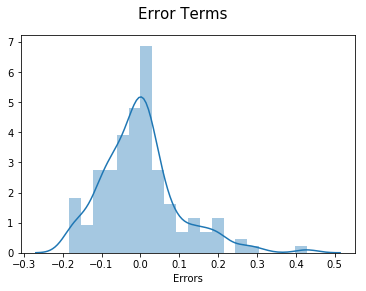

In [68]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 15)                   
plt.xlabel('Errors', fontsize = 10)                        

___The error term is approximately normally distributed with mean centered at zero.___

### Making predictions

In [69]:
# applying scaling on test sets
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [70]:
# dividing into X_test and y_test
y_test = df_test.pop('price')
X_test = df_test

In [71]:
X_test.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.583871,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,0.556580,0.544314,0.209375,...,0.064516,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645
std,0.271724,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,0.228484,0.160738,0.273690,...,0.247676,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512
min,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,-0.111111,-0.060606,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,0.404762,0.484848,0.093750,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.387931,0.547967,0.441667,0.588496,0.406129,0.226415,0.563492,0.585859,0.125000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.800000,0.570690,0.719919,0.516667,0.699115,0.564876,0.316038,0.746032,0.641414,0.150000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,0.932075,0.888889,0.863636,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
# Creating X_test_new dataframe by having same variables from X_test
X_train_new = X_train_lm.drop('const', axis = 1)
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [73]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Model evaluation

In [75]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7753780026253914

Text(0,0.5,'y_pred')

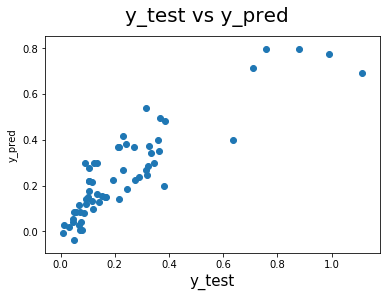

In [76]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=15)
plt.ylabel('y_pred', fontsize=10)

___Thus the model is able to predict the prices fairly satisfactorily___

The final variables which impacts the price of cars in US market are:
-  __torque__ -  The heavier the car is, the more torque it needs to move. The faster the car goes the more torque it needs. It is important to know the torque of the car to understand how strong it is. It may affect towing capacity, performance at load, immediate acceleration, etc. Torque will also tell you what kind of tires may be required. Torque is diretly proportional to horsepower and inversly proportional to RPM. So, if torque increases, price increases.

-  __wheelbasewidthratio__ -  As the wheel base length is decreased, stability is lost, but maneuverability is increased. Some of the stability can be regained through widening the car width. Conversly, as the wheel base length is increased, stability is gained, maneuverability is lost. There is also risk of the vehicle becoming high-centered (ground rubbing the center of the vehicle) when traversing bumps in the road unless the ride height of the vehicle is increased or in some way gain more ground clearance, but then some stability is lost due to a higher center of gravity. Manufacturing cost will increase. Also, as interior space increases thus giving room for more aesthetic and luxurious interiors. So, as wheelbase-car width ratio increases, price increases.

-  __enginelocation_rear__ - Engine placement tends to correspond to how the rest of the car is configured, specifically, which wheels drive the car. A rear-mounted engine is a popular design for sports cars (TATA nano is one exception) because placing the power source behind the rear axle increases acceleration and braking ability. Also, due to the nature of the design, rear-engine cars tend to be considerably smaller than an average passenger vehicle. This size advantage improves handling as well but it is prone to a type of skidding called oversteer. Lot of factors comes into play. Thus, Cost increases for rear engine cars.

-  __CarCompany_bmw__ - Price increases. Mostly luxury cars and sports cars.